<a href="https://colab.research.google.com/github/Muscipulaa/SOVCOM/blob/main/SOVCOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r"/content/drive/MyDrive/test_atm_analysis.csv")

In [ ]:
data.head(15)

,TIME,TRANSACTION_ID,AMOUNT,CLIENT_ID,BANK_ID,CITY,OPERATION_TYPE,FRAUD_FLAG
0,2023-05-01 10:46:13,524834800723,390,BA2FE876DF8CDBDC5EC8549F764C996838D6EF9A3C0F5C...,1,Петропавловск-Камчатский г,Пополнение через наши банкоматы,0
1,2023-05-01 10:47:46,524834800746,310,BA2FE876DF8CDBDC5EC8549F764C996838D6EF9A3C0F5C...,1,Петропавловск-Камчатский г,Пополнение через наши банкоматы,0
2,2023-05-01 10:51:55,524834800795,390,17C0EC56C8190EC14D48749C760414BA8CFC565CD5E4E8...,1,Петропавловск-Камчатский г,Пополнение через наши банкоматы,0
3,2023-05-01 11:14:58,524840527908,80,00547AF159358A2956CD20E787F65D2B4EC82C70CF98F3...,1,Елизово г,Пополнение через наши банкоматы,0
4,2023-05-01 11:37:48,524848052828,590,2D0B6EBD900C5695C6A4380D29C71B173145BA7A5A56B3...,1,Елизово г,Пополнение через наши банкоматы,0
5,2023-05-01 10:41:55,524848053075,860,9E2BE3D7DC5DD5903827424504D830D29263D048A518C8...,1,Невельск г,Пополнение через наши банкоматы,0
6,2023-05-01 10:43:58,524848053258,230,315D315B42E7DE042AF9CF9C27A6517E1E80A1F31F0524...,1,Углегорск г,Пополнение через наши банкоматы,0
7,2023-05-01 10:45:22,524848053472,2340,E0FE37C40B53F2394A89AC47E00D5AFED71C41E4051AE7...,1,Углегорск г,Пополнение через наши банкоматы,0
8,2023-05-01 10:46:46,524848053856,240,D50CCACB841E0BFD2EF2A37CE6854456BF17235C19D873...,1,Невельск г,Пополнение через наши банкоматы,0
9,2023-05-01 10:48:52,524848053942,580,D50CCACB841E0BFD2EF2A37CE6854456BF17235C19D873...,1,Невельск г,Пополнение через наши банкоматы,0


In [6]:
data['MOUNTH'] = pd.to_datetime(data['TIME']).dt.to_period('M')
data['MOUNTH'].unique()

<PeriodArray>
['2023-05', '2023-06', '2023-07']
Length: 3, dtype: period[M]

Данные представлены за три месяца: МАЙ, ИЮНЬ, ИЮЛЬ

Найдем номинальный оборот в разрезе по месяцам

**1. ЭКОНОМИЧЕСКИЕ ПОКАЗАТЕЛИ**

In [7]:
nominal = data.groupby(['MOUNTH', 'BANK_ID'])['AMOUNT'].sum().reset_index()

Определим количество операций в разрезе по месяцам и банкам

In [8]:
count_of_month = data.groupby(['BANK_ID', 'MOUNTH'])['TRANSACTION_ID'].count().reset_index()

Первоначально (*pivot_of_dynamic_1*), объединим исходный датасет с новыми столбцами, имеющими численные значения номинального оборота по общим столбцам 'BANK_ID'и 'month_and_year'. Затем (*pivot_of_dynamic_2*) к объединенному датасету добавим информацию о количестве операций. Переименуем новые столбцы для лучшего понимания: NOMINAL_TRANSACT - номинальный оборот, COUNT_TRANSACT - число операций. И все в срезе по месяцам

In [9]:
pivot_of_dynamic_1 = data.merge(nominal, on=['BANK_ID', 'MOUNTH'])
pivot_of_dynamic_2 = pivot_of_dynamic_1.merge(count_of_month, on=['BANK_ID', 'MOUNTH'])
pivot_of_dynamic_2 = pivot_of_dynamic_2.rename(columns={'AMOUNT_y':'NOMINAL_TRANSACT', 'TRANSACTION_ID_y':'COUNT_TRANSACT'})
pivot_of_dynamic_2.head(15)

,TIME,TRANSACTION_ID_x,AMOUNT_x,CLIENT_ID,BANK_ID,CITY,OPERATION_TYPE,FRAUD_FLAG,MOUNTH,NOMINAL_TRANSACT,COUNT_TRANSACT
0,2023-05-01 10:46:13,524834800723,390,BA2FE876DF8CDBDC5EC8549F764C996838D6EF9A3C0F5C...,1,Петропавловск-Камчатский г,Пополнение через наши банкоматы,0,2023-05,123245440,163436
1,2023-05-01 10:47:46,524834800746,310,BA2FE876DF8CDBDC5EC8549F764C996838D6EF9A3C0F5C...,1,Петропавловск-Камчатский г,Пополнение через наши банкоматы,0,2023-05,123245440,163436
2,2023-05-01 10:51:55,524834800795,390,17C0EC56C8190EC14D48749C760414BA8CFC565CD5E4E8...,1,Петропавловск-Камчатский г,Пополнение через наши банкоматы,0,2023-05,123245440,163436
3,2023-05-01 11:14:58,524840527908,80,00547AF159358A2956CD20E787F65D2B4EC82C70CF98F3...,1,Елизово г,Пополнение через наши банкоматы,0,2023-05,123245440,163436
4,2023-05-01 11:37:48,524848052828,590,2D0B6EBD900C5695C6A4380D29C71B173145BA7A5A56B3...,1,Елизово г,Пополнение через наши банкоматы,0,2023-05,123245440,163436
5,2023-05-01 10:41:55,524848053075,860,9E2BE3D7DC5DD5903827424504D830D29263D048A518C8...,1,Невельск г,Пополнение через наши банкоматы,0,2023-05,123245440,163436
6,2023-05-01 10:43:58,524848053258,230,315D315B42E7DE042AF9CF9C27A6517E1E80A1F31F0524...,1,Углегорск г,Пополнение через наши банкоматы,0,2023-05,123245440,163436
7,2023-05-01 10:45:22,524848053472,2340,E0FE37C40B53F2394A89AC47E00D5AFED71C41E4051AE7...,1,Углегорск г,Пополнение через наши банкоматы,0,2023-05,123245440,163436
8,2023-05-01 10:46:46,524848053856,240,D50CCACB841E0BFD2EF2A37CE6854456BF17235C19D873...,1,Невельск г,Пополнение через наши банкоматы,0,2023-05,123245440,163436
9,2023-05-01 10:48:52,524848053942,580,D50CCACB841E0BFD2EF2A37CE6854456BF17235C19D873...,1,Невельск г,Пополнение через наши банкоматы,0,2023-05,123245440,163436


In [10]:
print(pivot_of_dynamic_2.loc[pivot_of_dynamic_2['NOMINAL_TRANSACT'].idxmax(), 'MOUNTH'])
pivot_of_dynamic_2['NOMINAL_TRANSACT'].max()

2023-05


123245440

In [11]:
print(pivot_of_dynamic_2.loc[pivot_of_dynamic_2['COUNT_TRANSACT'].idxmax(), 'MOUNTH'])
pivot_of_dynamic_2['COUNT_TRANSACT'].max()

2023-06


170483

Посчитаем динамику роста с помощью метода diff(), который считает разницу NOMINAL_TRANSACT текущего месяца и предыдущего. Максимальная динамика оборотов наблюдается у банка с ID=3.

In [12]:
pivot_of_dynamic_2['DYNAMIC'] = pivot_of_dynamic_2.groupby('BANK_ID')['NOMINAL_TRANSACT'].diff()
pivot_of_dynamic_2.sort_values(by='DYNAMIC', ascending=False).head(5)

,TIME,TRANSACTION_ID_x,AMOUNT_x,CLIENT_ID,BANK_ID,CITY,OPERATION_TYPE,FRAUD_FLAG,MOUNTH,NOMINAL_TRANSACT,COUNT_TRANSACT,DYNAMIC
586756,2023-07-01 06:39:50,540290142290,160,0E4E79DB7F4EE90992FC27BBD744BE5FB24DCE2E0F3BC7...,3,SOSENSKOE P,Пополнение через банкоматы партнеров,0,2023-07,44771450,45866,21089220.0
588201,2023-07-01 03:56:26,540298902116,1480,E11371E4DD02D7F47A6E5760A563505E233DDAEF8D80A0...,3,MAGDAGACHI PG,Снятие через банкоматы партнеров,0,2023-07,44771450,45866,21089220.0
589850,2023-07-01 07:10:34,540307871754,700,CB83E885F6DF50A2FC3999FB13AF493A6217E238659745...,3,BARNAUL G,Пополнение через банкоматы партнеров,0,2023-07,44771450,45866,21089220.0
589740,2023-07-01 08:57:17,540307323877,80,74ED6012C55E5DA2705B5647CECA1FEF6402A88A152DD4...,3,CHITA G,Пополнение через банкоматы партнеров,0,2023-07,44771450,45866,21089220.0
589697,2023-07-01 05:46:08,540307165998,230,600170DAA6DD5C91075B3CD74A6104E06FD273FFD4DEC6...,3,MOSKVA G,Пополнение через банкоматы партнеров,0,2023-07,44771450,45866,21089220.0


In [13]:
pivot_of_dynamic_2.sort_values(by='COUNT_TRANSACT', ascending=False).head(5)

,TIME,TRANSACTION_ID_x,AMOUNT_x,CLIENT_ID,BANK_ID,CITY,OPERATION_TYPE,FRAUD_FLAG,MOUNTH,NOMINAL_TRANSACT,COUNT_TRANSACT,DYNAMIC
391985,2023-06-12 14:26:08,534636509938,340,C114F58879F0EEC25A8374C88D5E0EF0873F611D8D8508...,1,Соль-Илецк г,Пополнение через наши банкоматы,0,2023-06,119906420,170483,0.0
377918,2023-06-10 11:37:25,534386195335,3130,9C6765AE18CEF6DC46ED54C79FB27155D6C175F5730E4E...,1,OKTYABRSKIY,Снятие через наши банкоматы,0,2023-06,119906420,170483,0.0
377914,2023-06-10 13:58:41,534386171761,160,6A40FBB27F6BC2ED73A0D7ECA4D505EDF34A2724DF1FCA...,1,KURSK,Снятие через наши банкоматы,0,2023-06,119906420,170483,0.0
377912,2023-06-10 13:47:48,534386164678,3130,C4EFD113984A9AA242A5BC6FFA3B2123E4DF1D61930133...,1,RYAZAN,Снятие через наши банкоматы,0,2023-06,119906420,170483,0.0
377911,2023-06-10 09:21:11,534386156151,470,BF79D5A07EC3FFEE5DD80DE7B0E7388B88D5B7E393CA26...,1,VELIKIE LUKI,Снятие через наши банкоматы,0,2023-06,119906420,170483,0.0


Интересное наблюдение: у банка3 максимальное значение динамики оборотов, но количество транзакций не велико, а у банка1 напротив - динамика оборотов нулевая, а количество транзакций - максимально. Это может свидетельствовать о стабильности банка1, то есть объем денежных операций на вход равен денежным операциям на выходе. У банка3 же имеют популярность редкие, но крупные денежные операции.

In [14]:
(
    pivot_of_dynamic_2.groupby(['BANK_ID','MOUNTH'])[['NOMINAL_TRANSACT', 'COUNT_TRANSACT']].sum()
    .sort_values(by=['MOUNTH', 'NOMINAL_TRANSACT'], ascending=[True, False])
)


,,NOMINAL_TRANSACT,COUNT_TRANSACT
BANK_ID,MOUNTH,,
1,2023-05,20142741731840,26711326096
3,2023-05,875078204940,1516167844
2,2023-05,284244556020,697646569
5,2023-05,216904973040,390773824
4,2023-05,60658334400,188925025
...,...,...,...
47,2023-07,275590,961
37,2023-07,241800,900
43,2023-07,154110,1089


Лидером в каждом из месяцев является банк с ID==1, демонстрируя наибольшие значения как по номинальному обороту (*NOMINAL_TRANSACT*), так и по количеству транзакций (*COUNT_TRANSACT*). Это свидетельсвует о высокой активности клиентов банка и эффективном использовании, обеспечивая ему значительное конкурентное преимущество

In [15]:
pivot_of_dynamic_2['PERCENTAGE_GROWTH'] = pivot_of_dynamic_2.groupby('BANK_ID')['COUNT_TRANSACT'].pct_change() * 100

In [97]:
(
    pivot_of_dynamic_2.groupby(['BANK_ID','MOUNTH'])[['PERCENTAGE_GROWTH', 'COUNT_TRANSACT']].sum()
    .sort_values(by=['MOUNTH', 'PERCENTAGE_GROWTH'], ascending=[True, False])
)

,,PERCENTAGE_GROWTH,COUNT_TRANSACT
BANK_ID,MOUNTH,,
12,2023-05,64.239829,988036
30,2023-05,48.514851,22500
20,2023-05,23.170732,163216
18,2023-05,6.713781,91204
4,2023-05,0.887725,188925025
...,...,...,...
14,2023-07,-212.302483,511225
1,2023-07,-260.447669,26635545616
6,2023-07,-407.142857,39312900


В мае банк12 демонстрирует наивысший процент роста (*PERCENTAGE_GROWTH*) на уровне 64.24% при количестве транзакций 988036.


В июне лидирует банк12 с процентом роста в 2092.2083% с количеством транзакций 823977025.


Интересное примечание, что в июне банк3 показал значительное снижение активности с отрицательным ростом (-423.71%). Однако в июле он успешно восстановился с положительным ростом (1752.74%),став лидером этого месяца, и увеличил количество транзакций почти на 21 % в июле месяце.

**2. АНАЛИЗ ФРОДОВ**

In [17]:
fraud_table = pivot_of_dynamic_2.query('FRAUD_FLAG==1')
fraud_table.head()

,TIME,TRANSACTION_ID_x,AMOUNT_x,CLIENT_ID,BANK_ID,CITY,OPERATION_TYPE,FRAUD_FLAG,MOUNTH,NOMINAL_TRANSACT,COUNT_TRANSACT,DYNAMIC,PERCENTAGE_GROWTH
596343,2023-07-01 06:04:16,540482085666,1610,CE04E622F86F602C957FA020B1459F73ABBFF5A6A32746...,3,TUIMAZY G,Пополнение через банкоматы партнеров,1,2023-07,44771450,45866,0.0,0.0
601492,2023-07-01 06:06:33,540517177893,80,CE04E622F86F602C957FA020B1459F73ABBFF5A6A32746...,3,TUIMAZY G,Пополнение через банкоматы партнеров,1,2023-07,44771450,45866,0.0,0.0
604605,2023-07-02 11:30:50,540636758790,470,B9983326ADA8FB296B488236557DE7A1FADB49300C4C82...,3,NALCHIK G,Пополнение через банкоматы партнеров,1,2023-07,44771450,45866,0.0,0.0
604786,2023-07-02 11:26:54,540640594084,470,B9983326ADA8FB296B488236557DE7A1FADB49300C4C82...,3,NALCHIK G,Снятие через банкоматы партнеров,1,2023-07,44771450,45866,0.0,0.0
605374,2023-07-02 11:22:31,540645052881,500,B9983326ADA8FB296B488236557DE7A1FADB49300C4C82...,3,NALCHIK G,Пополнение через банкоматы партнеров,1,2023-07,44771450,45866,0.0,0.0


In [18]:
(
    fraud_table.groupby(['CLIENT_ID', 'CITY', 'MOUNTH', 'OPERATION_TYPE'])[['COUNT_TRANSACT']].sum()
    .sort_values(by=['MOUNTH', 'COUNT_TRANSACT'], ascending=[True, False])
)

COUNT_TRANSACT
CLIENT_ID                                          CITY          MOUNTH  OPERATION_TYPE                                      
878845BF4574E76A13D362CD5EC8F0D95CAFFBCDE6E7440... EKATERINBURG  2023-07 Снятие через банкоматы партнеров             1009052
                                                   Visa Direct   2023-07 Пополнение через банкоматы партнеров         1009052
0DBB0A99DB550F7030ED547F7105A61A901CE3A07396960... UKHTA G       2023-07 Пополнение через банкоматы партнеров          458660
                                                                         Снятие через банкоматы партнеров              458660
18D7D8A0C55811587DDA9BC8C6154EAFAEC7A5590D5F9E5... GRIAZI G      2023-07 Снятие через банкоматы партнеров              412794
...                                                                                                                       ...
B51A7A8867B7457D29A386478EFA4C32233FE5A0CFB3A67... Visa Direct   2023-07 Пополнение через банкоматы партнеров            6270
DC94535434CE39472C2BEB7336679FE03FA299E5839F39B... IL INKA       2023-07 Пополнение через банкоматы партнеров            6270
A05AB2289DA3BD464C78E1A4998788BEE31E8A3D9951B75... G PENZA       2023-07 Пополнение через банкоматы партнеров             984
                                                                         Снятие через банкоматы партнеров                 984
3190CC3B64DE99FD94A1773284FC43242A0DB5FC3FA3023... G KRASNOYARSK 2023-07 Снятие через банкоматы партнеров                 738

[134 rows x 1 columns]

In [19]:
client_1 = '878845BF4574E76A13D362CD5EC8F0D95CAFFBCDE6E744011B76A8B0AF9E704A'
client_2 = '878845BF4574E76A13D362CD5EC8F0D95CAFFBCDE6E744011B76A8B0AF9E704A'

client_1 == client_2

True

Наибольшее количество транзакций зафиксировано в двух записях с одинаковыми значениями, которые были совершены одним и тем же клиентом. Операции снятия денег происходили в Екатеринбурге, а пополнение осуществлялось через Visa Direct, что может свидетельствовать об электронных переводах.


In [20]:
slice_fraud = (
    fraud_table.groupby(['MOUNTH', 'OPERATION_TYPE'])[['COUNT_TRANSACT']].sum()
    .sort_values(by=['MOUNTH', 'COUNT_TRANSACT'], ascending=[True, False])
    .rename(columns={'COUNT_TRANSACT': 'FRAUD_TRANSACT'})
)

In [21]:
slice_all = (
    pivot_of_dynamic_2.groupby(['MOUNTH', 'OPERATION_TYPE'])['COUNT_TRANSACT'].sum().reset_index()
    .rename(columns={'COUNT_TRANSACT': 'TOTAL_TRANSACT'})
)

In [22]:
fraud_share = slice_fraud.merge(slice_all, on=['MOUNTH', 'OPERATION_TYPE'])
fraud_share['FRAUD_SHARE'] = fraud_share['FRAUD_TRANSACT'] / fraud_share['TOTAL_TRANSACT']
fraud_share

,MOUNTH,OPERATION_TYPE,FRAUD_TRANSACT,TOTAL_TRANSACT,FRAUD_SHARE
0,2023-07,Снятие через банкоматы партнеров,11446042,1073180883,0.010666
1,2023-07,Пополнение через банкоматы партнеров,5944060,1464371095,0.004059
2,2023-07,Снятие через чужие банкоматы,12445,923250620,0.000013


**3. АНАЛИЗ ОБЫЧНЫХ ОПЕРАЦИЙ**

In [23]:
not_fraud_table = pivot_of_dynamic_2.query('FRAUD_FLAG==0')

In [24]:
(
    not_fraud_table.groupby(['CLIENT_ID', 'CITY', 'MOUNTH', 'OPERATION_TYPE'])[['COUNT_TRANSACT']].sum()
    .sort_values(by=['MOUNTH', 'COUNT_TRANSACT'], ascending=[True, False])
)

,,,,COUNT_TRANSACT
CLIENT_ID,CITY,MOUNTH,OPERATION_TYPE,
8D424518D09DA4DED80259D2042793C16BFC52CBD3A819F58D6F0AE462923010,LISKI,2023-05,Снятие через наши банкоматы,9315852
C52587788579FDB83FA5EEB92D489294702EF3AE1097C7B023377AA9D9AA4F34,Москва г,2023-05,Пополнение через наши банкоматы,9315852
723248E9CDBF3D5FCDD5C0B0A8BBF58FD1D7188D2FC4653B16B6AD895EDB61A8,MOSKVA,2023-05,Снятие через наши банкоматы,8498672
C52587788579FDB83FA5EEB92D489294702EF3AE1097C7B023377AA9D9AA4F34,Г.МОСКВА,2023-05,Пополнение через наши банкоматы,7027748
29CA8E0CAC4823DD6D42EEFF60E7998BA197913738A513F558709E2274AA8BD5,NOVOANNINSKIY,2023-05,Снятие через наши банкоматы,6210568
...,...,...,...,...
343123D00AA3824B8541FC2DF1BA5F63D88DB4570EA545A9988E70C378DBEF5F,Suhoi Log,2023-07,Снятие через чужие банкоматы,21
3B64F8462DF35F5751DFD5871F48CC1544C7209B39A38B270592D345BDD503F7,Berezovskiyi,2023-07,Снятие через чужие банкоматы,21
3FEC28C49B6EFCDE457DE6C60590911C2FB0D9AD0E9E4E5DF216BD9AD2E9B373,ASTRAHAN,2023-07,Снятие через чужие банкоматы,20


In [25]:
client_3 = '8D424518D09DA4DED80259D2042793C16BFC52CBD3A819F58D6F0AE462923010'
client_4 = 'C52587788579FDB83FA5EEB92D489294702EF3AE1097C7B023377AA9D9AA4F34'

client_3 == client_4

False

In [26]:
slice_not_fraud = (
    not_fraud_table.groupby(['MOUNTH', 'OPERATION_TYPE'])[['COUNT_TRANSACT']].sum()
    .sort_values(by=['MOUNTH', 'COUNT_TRANSACT'], ascending=[True, False])
    .rename(columns={'COUNT_TRANSACT': 'NOT_FRAUD_TRANSACT'})
)

In [27]:
not_fraud_share = slice_not_fraud.merge(slice_all, on=['MOUNTH', 'OPERATION_TYPE'])
not_fraud_share['NOT_FRAUD_SHARE'] = not_fraud_share['NOT_FRAUD_TRANSACT'] / not_fraud_share['TOTAL_TRANSACT']
not_fraud_share

,MOUNTH,OPERATION_TYPE,NOT_FRAUD_TRANSACT,TOTAL_TRANSACT,NOT_FRAUD_SHARE
0,2023-05,Пополнение через наши банкоматы,14116621064,14116621064,1.000000
1,2023-05,Снятие через наши банкоматы,12389919724,12389919724,1.000000
2,2023-05,Пополнение через банкоматы партнеров,1034608010,1034608010,1.000000
3,2023-05,Снятие через чужие банкоматы,937242471,937242471,1.000000
4,2023-05,Снятие через банкоматы партнеров,920064279,920064279,1.000000
5,2023-05,Снятие чере наши банкоматы,172424980,172424980,1.000000
6,2023-06,Пополнение через наши банкоматы,16289480167,16289480167,1.000000
7,2023-06,Снятие через наши банкоматы,12591533414,12591533414,1.000000
8,2023-06,Пополнение через банкоматы партнеров,1181660010,1181660010,1.000000
9,2023-06,Снятие через чужие банкоматы,1070371837,1070371837,1.000000


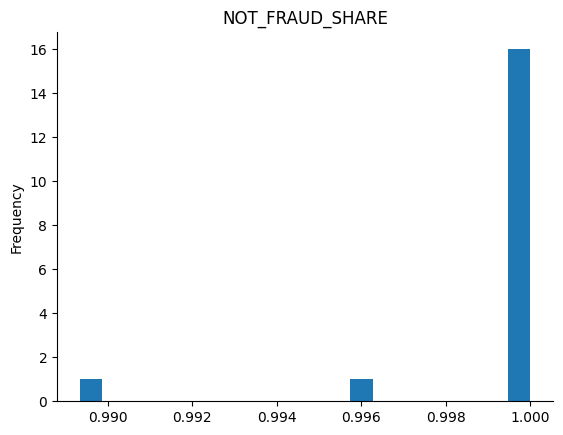

In [95]:
from matplotlib import pyplot as plt
not_fraud_share['NOT_FRAUD_SHARE'].plot(kind='hist', bins=20, title='NOT_FRAUD_SHARE')
plt.gca().spines[['top', 'right',]].set_visible(False)

**АНАЛИЗ ДАННЫХ**

In [84]:
pivot_of_dynamic_2['CITY'] = pivot_of_dynamic_2['CITY'].fillna('Unknown')
pivot_of_dynamic_2['DYNAMIC'].fillna(pivot_of_dynamic_2['DYNAMIC'].median())
pivot_of_dynamic_2['PERCENTAGE_GROWTH'].fillna(pivot_of_dynamic_2['PERCENTAGE_GROWTH'].median())

,PERCENTAGE_GROWTH
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
873838,0.0
873839,0.0
873840,0.0
873841,0.0


In [30]:
pivot_of_dynamic_2.describe()

,TRANSACTION_ID_x,AMOUNT_x,BANK_ID,FRAUD_FLAG,NOMINAL_TRANSACT,COUNT_TRANSACT,DYNAMIC,PERCENTAGE_GROWTH
count,8.738430e+05,873843.000000,873843.000000,873843.000000,8.738430e+05,873843.000000,8.737960e+05,873796.000000
mean,5.359082e+11,651.013592,2.641415,0.000595,7.426270e+07,105247.370099,1.422963e+01,0.001554
std,6.382375e+09,1315.737246,3.719175,0.024387,5.204488e+07,70233.778390,4.318667e+05,0.604945
min,5.248348e+11,0.000000,1.000000,0.000000,1.690000e+03,20.000000,-2.108922e+07,-67.692308
25%,5.305598e+11,160.000000,1.000000,0.000000,1.155254e+07,26809.000000,0.000000e+00,0.000000
50%,5.361022e+11,330.000000,1.000000,0.000000,1.133902e+08,163204.000000,0.000000e+00,0.000000
75%,5.416679e+11,610.000000,3.000000,0.000000,1.199064e+08,163436.000000,0.000000e+00,0.000000
max,5.477769e+11,156590.000000,47.000000,1.000000,1.232454e+08,170483.000000,2.108922e+07,250.000000


In [32]:
correlation_pirson = pivot_of_dynamic_2[column_for_analysis].corr()
correlation_pirson

,AMOUNT_x,NOMINAL_TRANSACT,COUNT_TRANSACT,DYNAMIC,PERCENTAGE_GROWTH
AMOUNT_x,1.000000,0.068947,0.062172,-0.000833,0.000272
NOMINAL_TRANSACT,0.068947,1.000000,0.995195,0.004081,-0.001745
COUNT_TRANSACT,0.062172,0.995195,1.000000,0.000620,-0.002780
DYNAMIC,-0.000833,0.004081,0.000620,1.000000,0.352005
PERCENTAGE_GROWTH,0.000272,-0.001745,-0.002780,0.352005,1.000000


<Axes: xlabel='HOUR', ylabel='COUNT_TRANSACT'>

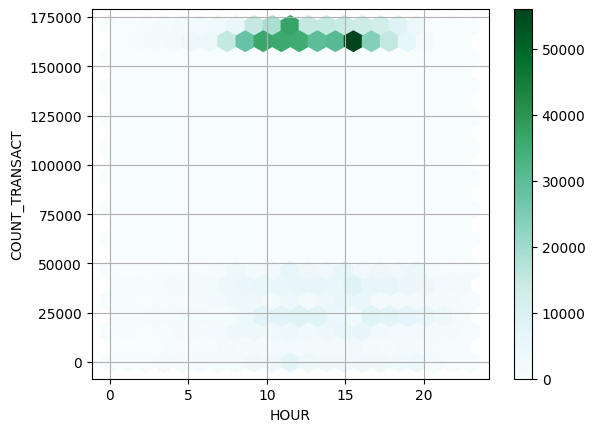

In [94]:
pivot_of_dynamic_2.plot(x='HOUR', y='COUNT_TRANSACT', kind='hexbin', gridsize=20, sharex=False, grid=True)

In [80]:
duplicates_SPb, duplicates_msk = ['Санкт-Петербург г', 'SANKT PETERBU', 'SANKT PETERBURG'], ['Москва г', 'MOSKVA', 'MOSKVA G']
pivot_of_dynamic_2['CITY'] = pivot_of_dynamic_2['CITY'].replace(duplicates_SPb, 'SAINT-PETERSBURG')
pivot_of_dynamic_2['CITY'] = pivot_of_dynamic_2['CITY'].replace(duplicates_msk, 'MOSCOW')
pivot_of_dynamic_2['CITY'].unique()

array(['Петропавловск-Камчатский г', 'Елизово г', 'Невельск г', ...,
       'PROSPEKT CHEK', 'PAVL POSAD', 'PRIRECHENSKAY'], dtype=object)

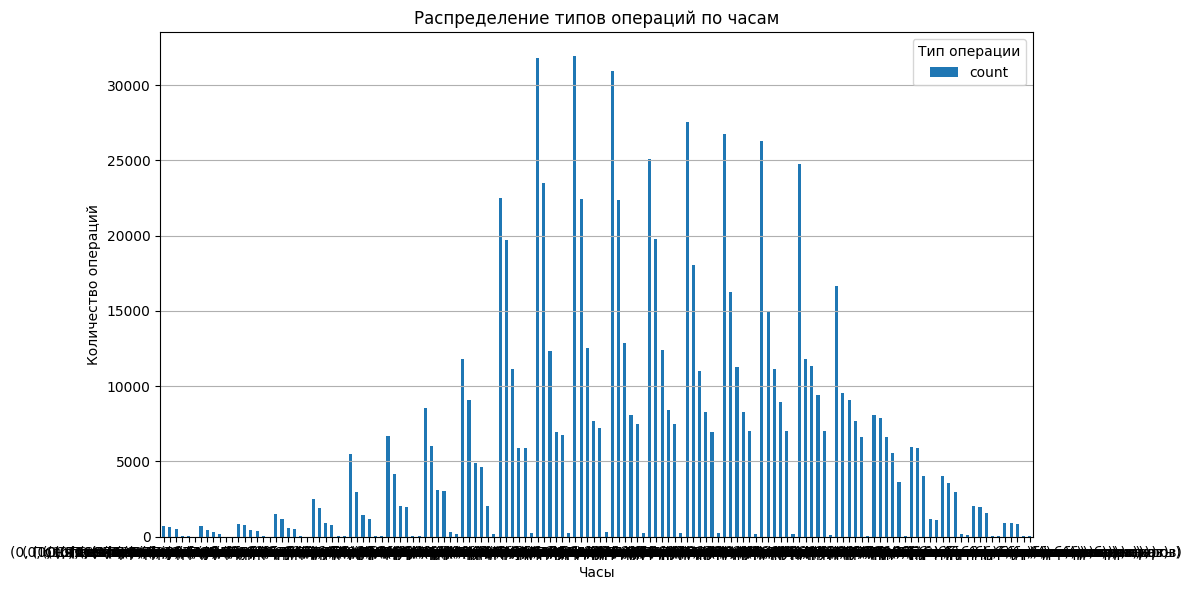